In [28]:
import pandas as pd
import numpy as np

#combines each game into one row
#should train with cleaner data, exclude outliers
games = 'train.csv'
gamesdf = pd.read_csv(games, header=0)

gamesdf['group_num'] = gamesdf.groupby('game_id').cumcount() + 1
pivoted_df = gamesdf.pivot(index='game_id', columns='group_num', values=['nickname', 'score', 'rating'])
pivoted_df.columns = [f'{col[0]}{col[1]}' for col in pivoted_df.columns]
pivoted_df['scorediff'] = pd.to_numeric(pivoted_df['score1']) - pd.to_numeric(pivoted_df['score2'])
pivoted_df['ratingdiff'] = pd.to_numeric(pivoted_df['rating1']) - pd.to_numeric(pivoted_df['rating2'])

#excludes huge score differences
pivoted_df = pivoted_df[abs(pivoted_df['scorediff']) <= 400]

pivoted_df.reset_index(inplace=True)

print(pivoted_df)

       game_id       nickname1  nickname2 score1 score2 rating1 rating2  \
0            1       BetterBot      stevy    335    429    1637    1500   
1            3       davidavid  BetterBot    440    318    1811    2071   
2            4  Inandoutworker  BetterBot    119    478    1473    1936   
3            5           stevy    STEEBot    325    427    1500    1844   
4            6          HivinD    STEEBot    378    427    2029    2143   
...        ...             ...        ...    ...    ...     ...     ...   
50130    72766          Glilac    STEEBot    449    457    2072    2099   
50131    72767          HAYDEN  BetterBot    340    414    1395    1952   
50132    72771            BB-8   HastyBot    390    393    1500    1614   
50133    72772       BetterBot  Gtowngrad    442    388    1674    1364   
50134    72773           adola   HastyBot    383    346    2075    2302   

       scorediff  ratingdiff  
0            -94         137  
1            122        -260  
2     

Slope: 1.0308331240158226
Intercept: 0.39522058884607203
R-squared: 0.25421084295428586
P-value: 0.0
Standard Error: 0.007885650331457028


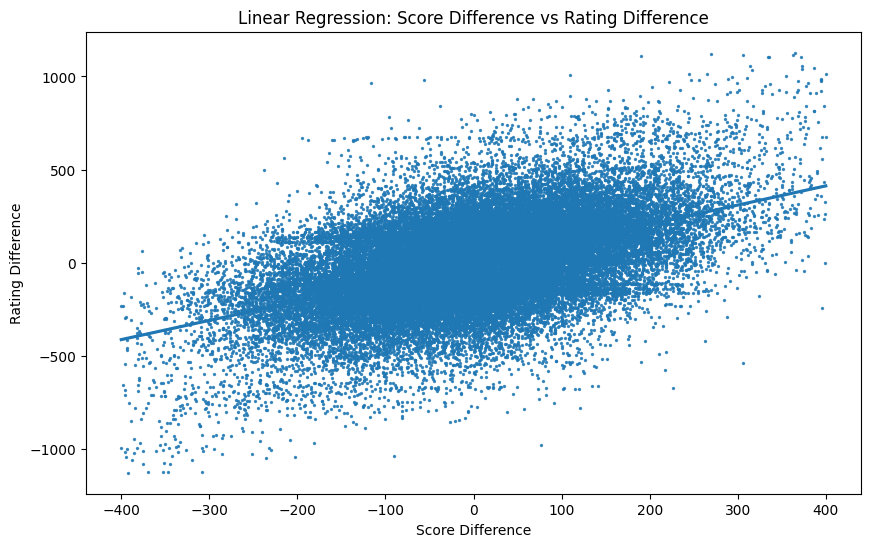

In [29]:

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress


plt.figure(figsize=(10, 6))
sns.regplot(x='scorediff', y='ratingdiff', data=pivoted_df, scatter_kws={'s': 2})
plt.title('Linear Regression: Score Difference vs Rating Difference')
plt.xlabel('Score Difference')
plt.ylabel('Rating Difference')


slope, intercept, r_value, p_value, std_err = linregress(pivoted_df['scorediff'], pivoted_df['ratingdiff'])


print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

plt.show()